
# Comprehensive EDA of the **Accidents and Bikers** dataset

This notebook extends the exploratory data analysis (EDA) on the **Accidents and Bikers** dataset.  
In addition to univariate statistics and distributions, it includes bivariate analysis, multivariate analysis, and time‑series exploration.

**Sections**

- Data loading and cleaning
- Overview and summary statistics
- Univariate analysis (categorical & numerical)
- **Bivariate analysis**
- **Multivariate analysis**
- **Time‑series analysis**

Charts are designed with clarity in mind: appropriate types, minimal clutter, and careful use of colour.


In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
title_font = {'fontsize': 14, 'fontweight': 'bold'}
sns.set_style('whitegrid')

%matplotlib inline


In [11]:

file_path = '/Users/rohankasodariya/Desktop/Zeel/Accidents and Bikers.csv'
df = pd.read_csv(file_path)
print('First few rows:')
print(df.head())
print()
print('Original shape:', df.shape)

# Drop rows with missing values
df_clean = df.dropna().reset_index(drop=True)
print('Shape after dropping missing:', df_clean.shape)


First few rows:
  Accident_Index  Number_of_Vehicles  Number_of_Casualties      Date   Time  \
0  197901A1SEE71                   2                     1  01/01/79  18:20   
1  197901A2JDW40                   1                     1  01/02/79   9:15   
2  197901A4IJV90                   2                     1  01/04/79   8:45   
3  197901A4NIE33                   2                     1  01/04/79  13:40   
4  197901A4SKO47                   2                     1  01/04/79  18:50   

   Speed_limit Road_conditions  Day         Road_type     Light_conditions  \
0           50            Snow    1  Dual carriageway  Darkness lights lit   
1           30            Snow    1           Unknown             Daylight   
2           30            Snow    1           Unknown             Daylight   
3           30             Wet    1           Unknown             Daylight   
4           30             Wet    1           Unknown  Darkness lights lit   

   ... Severity   Age_Grp Month  Year  D

In [3]:

print('Data types:')
print(df_clean.dtypes)
print()

numeric_cols = df_clean.select_dtypes(include=['int64','float64']).columns
summary_stats = df_clean[numeric_cols].describe().T
summary_stats


Data types:
Accident_Index          object
Number_of_Vehicles       int64
Number_of_Casualties     int64
Date                    object
Time                    object
Speed_limit              int64
Road_conditions         object
Day                      int64
Road_type               object
Light_conditions        object
Gender                  object
Severity                object
Age_Grp                 object
Month                    int64
Year                     int64
DayOfWeek               object
Hour                     int64
Minute                   int64
is_dark                  int64
is_weekend               int64
severity_binary          int64
dtype: object



,count,mean,std,min,25%,50%,75%,max
Number_of_Vehicles,120040.0,1.968177,0.364157,1.0,2.0,2.0,2.0,8.0
Number_of_Casualties,120040.0,1.067819,0.336977,1.0,1.0,1.0,1.0,60.0
Speed_limit,120040.0,34.145735,10.291309,0.0,30.0,30.0,30.0,70.0
Day,120040.0,15.801325,8.536201,1.0,8.0,16.0,23.0,31.0
Month,120040.0,6.646118,3.246421,1.0,4.0,7.0,9.0,12.0
Year,120040.0,1981.037029,1.391662,1979.0,1980.0,1981.0,1982.0,1983.0
Hour,120040.0,14.146176,4.450573,0.0,11.0,15.0,17.0,23.0
Minute,120040.0,26.435180,17.362959,0.0,10.0,30.0,40.0,59.0
is_dark,120040.0,0.164945,0.371132,0.0,0.0,0.0,0.0,1.0
is_weekend,120040.0,0.230756,0.421319,0.0,0.0,0.0,0.0,1.0


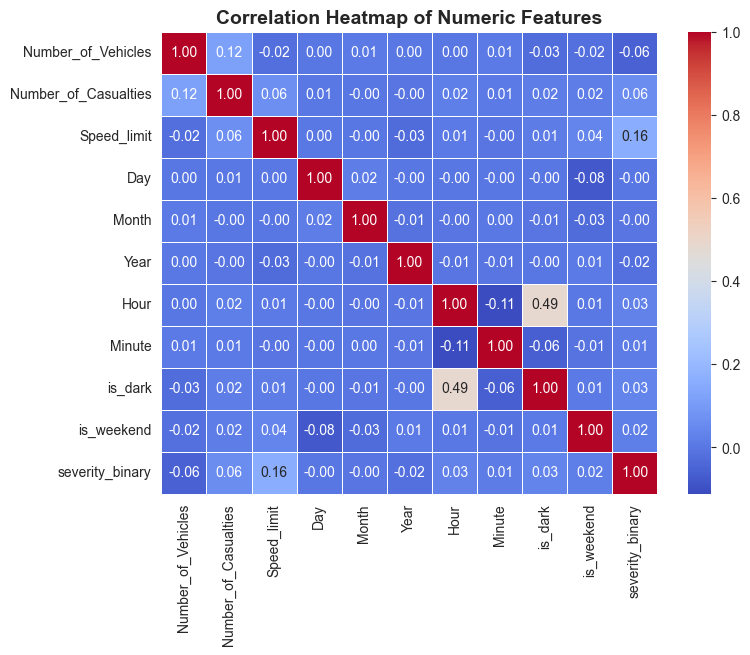

In [16]:
numeric_cols = df.select_dtypes(include='number').columns  
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', **title_font)
plt.show()

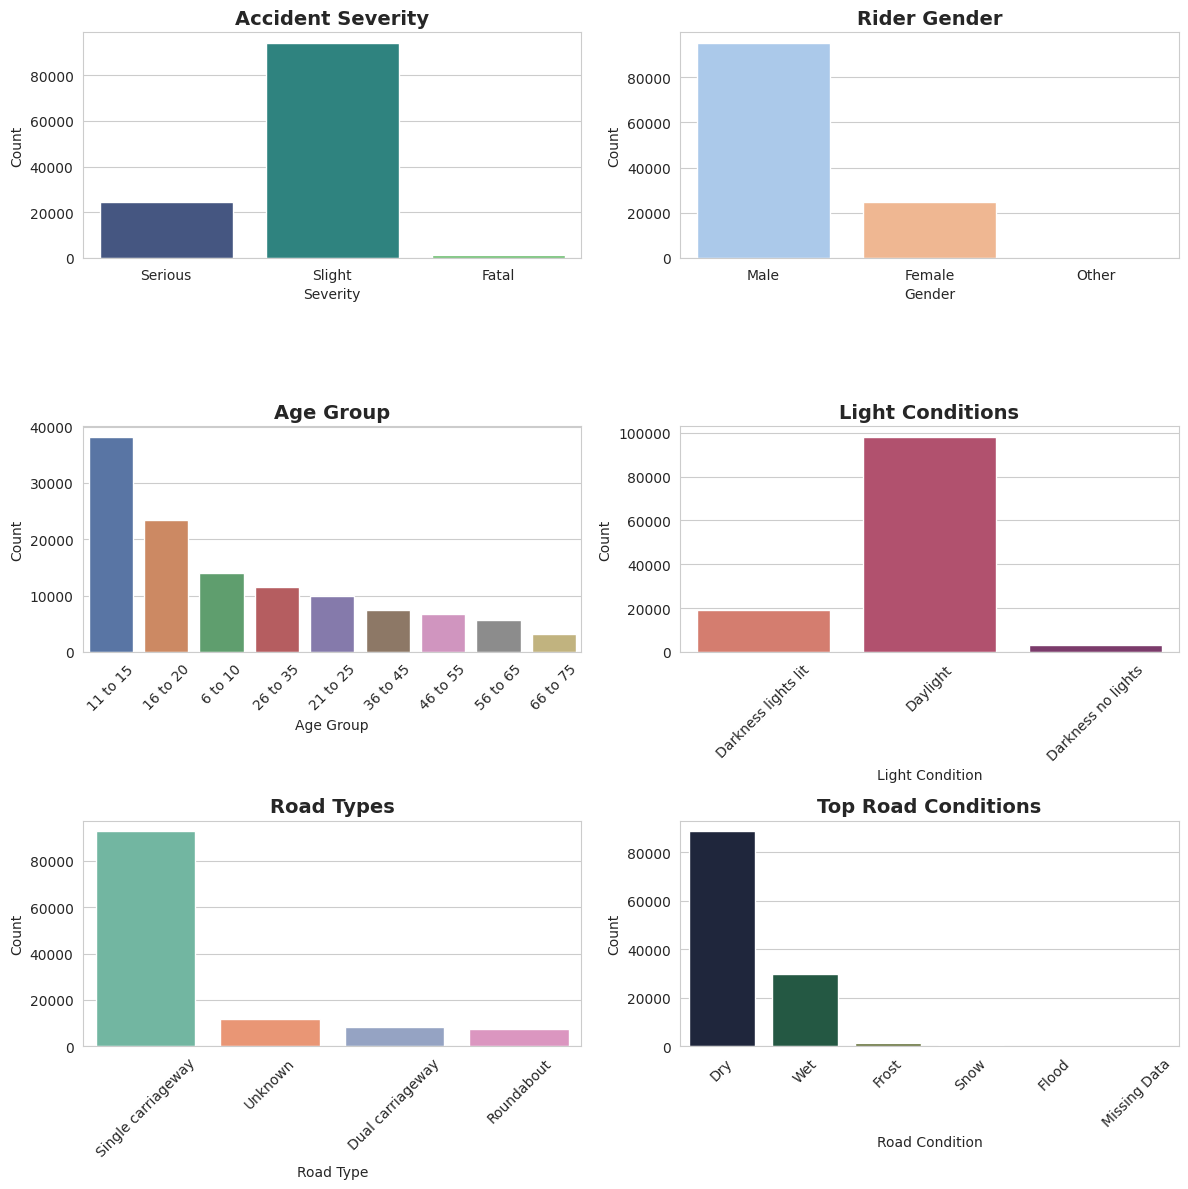

In [4]:

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

sns.countplot(data=df_clean, x='Severity', palette='viridis', ax=axes[0,0])
axes[0,0].set_title('Accident Severity', **title_font)
axes[0,0].set_xlabel('Severity')
axes[0,0].set_ylabel('Count')

sns.countplot(data=df_clean, x='Gender', palette='pastel', ax=axes[0,1])
axes[0,1].set_title('Rider Gender', **title_font)
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Count')

sns.countplot(data=df_clean, x='Age_Grp', order=df_clean['Age_Grp'].value_counts().index, palette='deep', ax=axes[1,0])
axes[1,0].set_title('Age Group', **title_font)
axes[1,0].set_xlabel('Age Group')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

sns.countplot(data=df_clean, x='Light_conditions', palette='flare', ax=axes[1,1])
axes[1,1].set_title('Light Conditions', **title_font)
axes[1,1].set_xlabel('Light Condition')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)

sns.countplot(data=df_clean, x='Road_type', order=df_clean['Road_type'].value_counts().index, palette='Set2', ax=axes[2,0])
axes[2,0].set_title('Road Types', **title_font)
axes[2,0].set_xlabel('Road Type')
axes[2,0].set_ylabel('Count')
axes[2,0].tick_params(axis='x', rotation=45)

ax = axes[2,1]
sns.countplot(data=df_clean, x='Road_conditions', order=df_clean['Road_conditions'].value_counts().index[:10], palette='cubehelix', ax=ax)
ax.set_title('Top Road Conditions', **title_font)
ax.set_xlabel('Road Condition')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


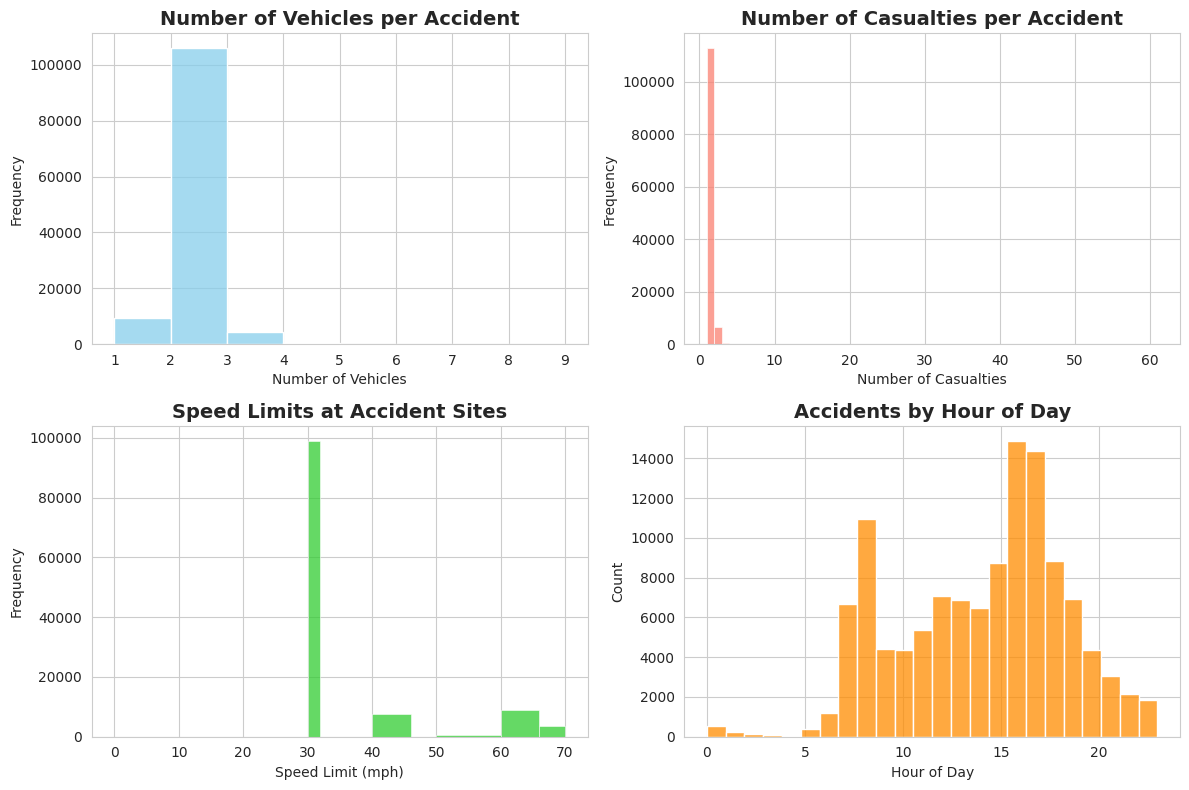

In [5]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df_clean['Number_of_Vehicles'], bins=range(1, df_clean['Number_of_Vehicles'].max()+2), kde=False, color='skyblue', ax=axes[0,0])
axes[0,0].set_title('Number of Vehicles per Accident', **title_font)
axes[0,0].set_xlabel('Number of Vehicles')
axes[0,0].set_ylabel('Frequency')

sns.histplot(df_clean['Number_of_Casualties'], bins=range(1, df_clean['Number_of_Casualties'].max()+2), kde=False, color='salmon', ax=axes[0,1])
axes[0,1].set_title('Number of Casualties per Accident', **title_font)
axes[0,1].set_xlabel('Number of Casualties')
axes[0,1].set_ylabel('Frequency')

sns.histplot(df_clean['Speed_limit'], bins=sorted(df_clean['Speed_limit'].unique()), kde=False, color='limegreen', ax=axes[1,0])
axes[1,0].set_title('Speed Limits at Accident Sites', **title_font)
axes[1,0].set_xlabel('Speed Limit (mph)')
axes[1,0].set_ylabel('Frequency')

sns.histplot(df_clean['Hour'], bins=24, kde=False, color='darkorange', ax=axes[1,1])
axes[1,1].set_title('Accidents by Hour of Day', **title_font)
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()


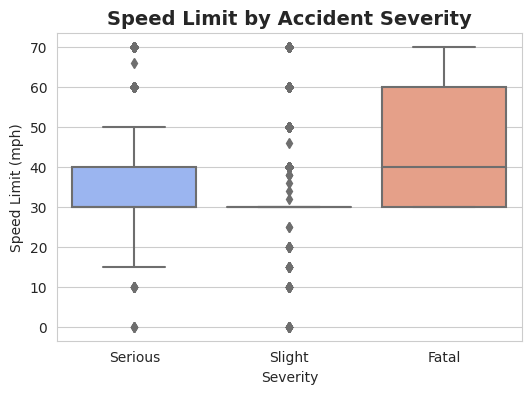

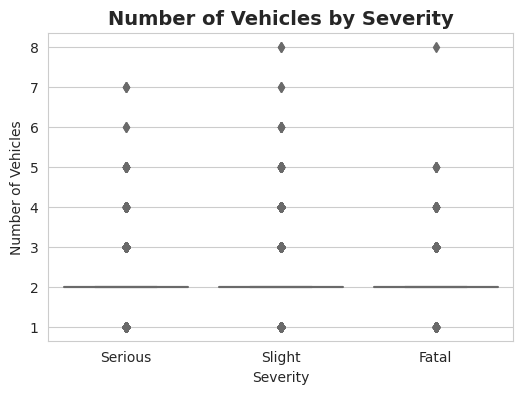

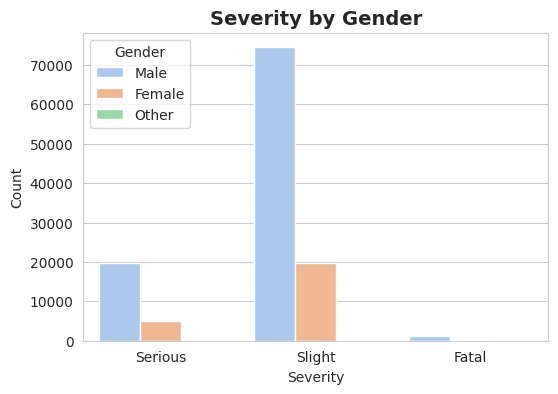

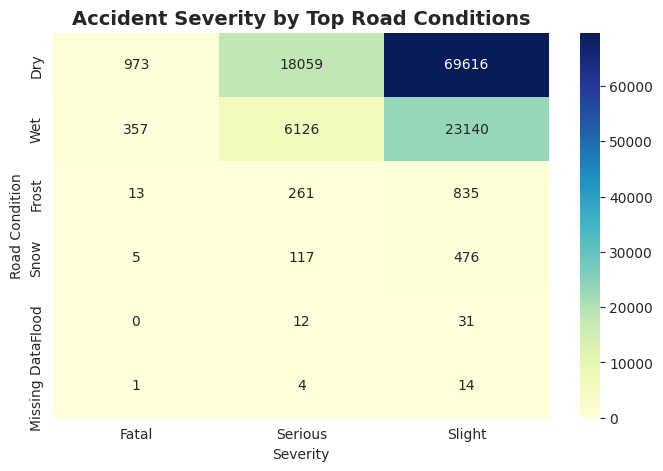

In [6]:

# Speed limit vs Severity
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='Severity', y='Speed_limit', palette='coolwarm')
plt.title('Speed Limit by Accident Severity', **title_font)
plt.xlabel('Severity')
plt.ylabel('Speed Limit (mph)')
plt.show()

# Number of vehicles vs Severity
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='Severity', y='Number_of_Vehicles', palette='Set3')
plt.title('Number of Vehicles by Severity', **title_font)
plt.xlabel('Severity')
plt.ylabel('Number of Vehicles')
plt.show()

# Severity by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Severity', hue='Gender', palette='pastel')
plt.title('Severity by Gender', **title_font)
plt.xlabel('Severity')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Road conditions vs Severity heatmap (top 10)
pivot_rc = pd.crosstab(df_clean['Road_conditions'], df_clean['Severity'])
top_rc = pivot_rc.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_top = pivot_rc.loc[top_rc]
plt.figure(figsize=(8,5))
sns.heatmap(pivot_top, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Accident Severity by Top Road Conditions', **title_font)
plt.xlabel('Severity')
plt.ylabel('Road Condition')
plt.show()


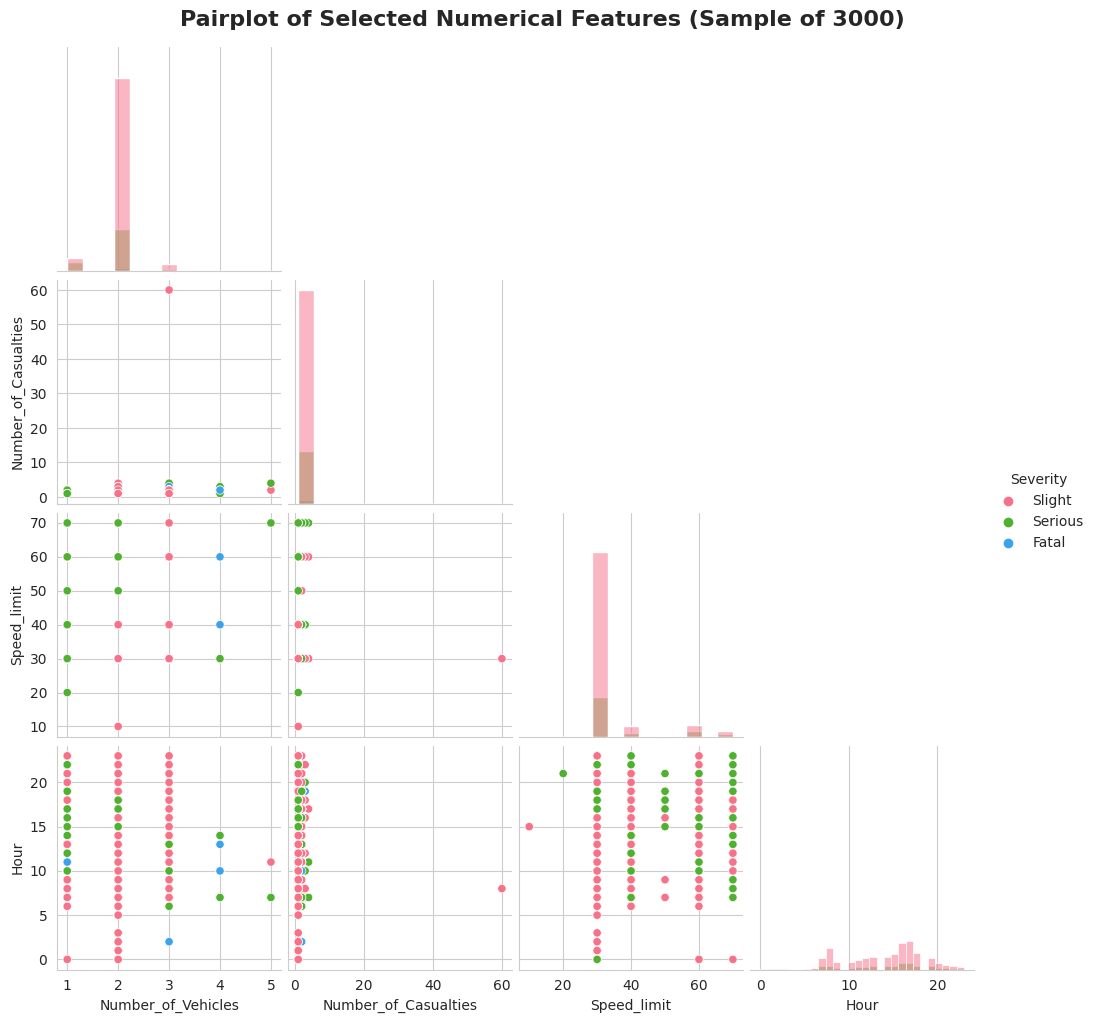

Average values of selected numeric variables by severity:
          Number_of_Vehicles  Number_of_Casualties  Speed_limit   Hour
Severity                                                              
Fatal                   2.09                  1.27        44.74  14.21
Serious                 1.92                  1.10        36.83  14.42
Slight                  1.98                  1.06        33.29  14.07


In [7]:

# Pairplot for selected numeric features (sampled), using hist on diagonal
sample_df = df_clean[['Number_of_Vehicles','Number_of_Casualties','Speed_limit','Hour','Severity']].sample(n=3000, random_state=42)
sns.pairplot(sample_df, hue='Severity', vars=['Number_of_Vehicles','Number_of_Casualties','Speed_limit','Hour'], diag_kind='hist', palette='husl', corner=True)
plt.suptitle('Pairplot of Selected Numerical Features (Sample of 3000)', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Group-wise mean of numeric variables by severity
group_stats = df_clean.groupby('Severity')[['Number_of_Vehicles','Number_of_Casualties','Speed_limit','Hour']].mean().round(2)
print('Average values of selected numeric variables by severity:')
print(group_stats)


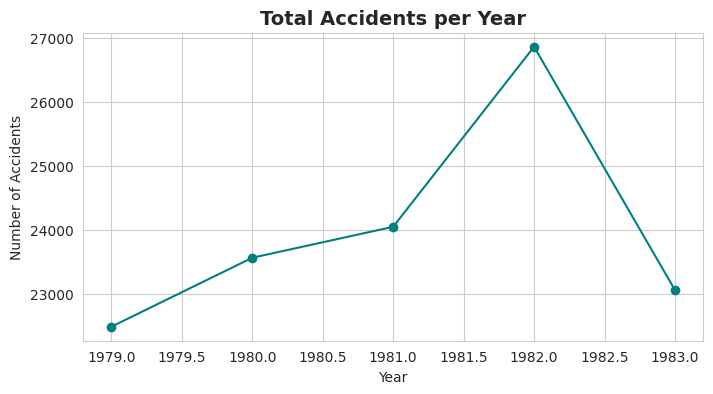

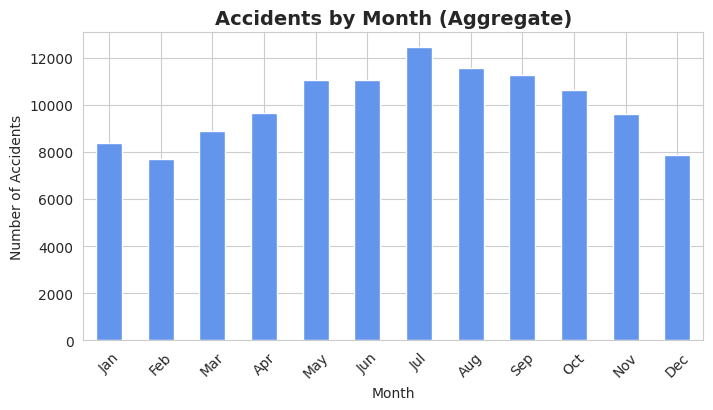

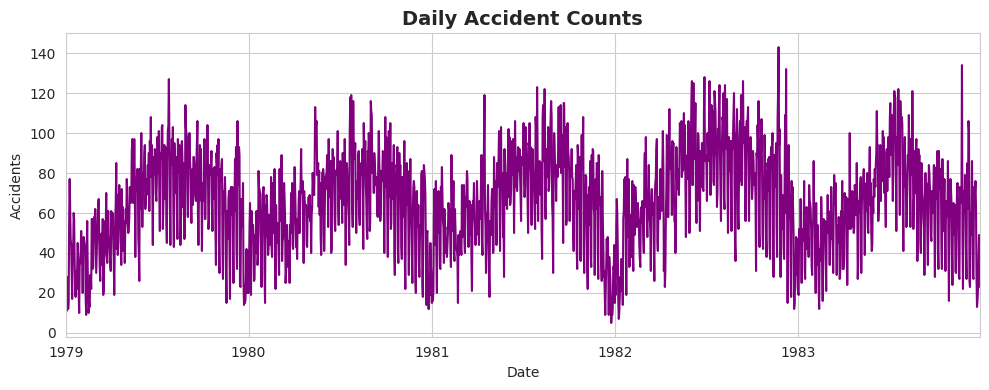

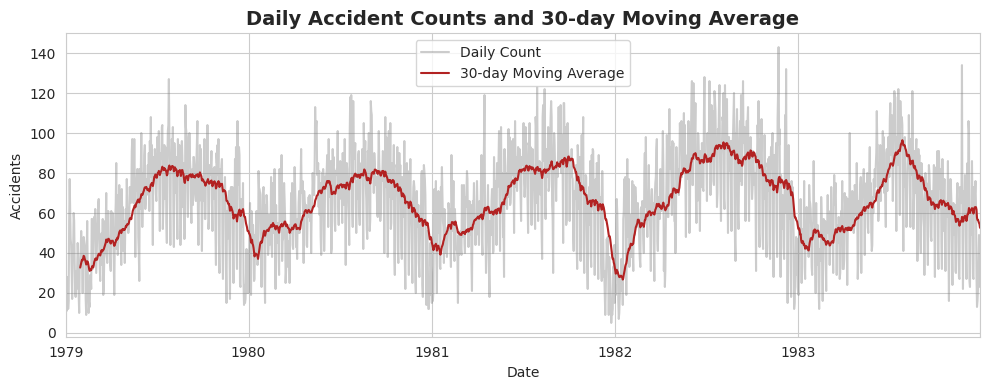

In [8]:

# Convert Date to datetime
try:
    df_clean['Date_dt'] = pd.to_datetime(df_clean['Date'], format='%Y-%m-%d')
except Exception:
    df_clean['Date_dt'] = pd.to_datetime(df_clean['Date'])

# Yearly trend
year_counts = df_clean.groupby(df_clean['Date_dt'].dt.year).size()
plt.figure(figsize=(8,4))
year_counts.plot(marker='o', color='teal')
plt.title('Total Accidents per Year', **title_font)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Monthly trend aggregated across years
month_counts = df_clean.groupby('Month').size().reindex(range(1,13))
plt.figure(figsize=(8,4))
month_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Accidents by Month (Aggregate)', **title_font)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.show()

# Daily counts and moving average
daily_counts = df_clean.groupby('Date_dt').size().sort_index()
plt.figure(figsize=(10,4))
daily_counts.plot(color='purple')
plt.title('Daily Accident Counts', **title_font)
plt.xlabel('Date')
plt.ylabel('Accidents')
plt.tight_layout()
plt.show()

# 30-day rolling average
rolling = daily_counts.rolling(window=30).mean()
plt.figure(figsize=(10,4))
daily_counts.plot(alpha=0.4, label='Daily Count', color='gray')
rolling.plot(color='firebrick', label='30-day Moving Average')
plt.title('Daily Accident Counts and 30-day Moving Average', **title_font)
plt.xlabel('Date')
plt.ylabel('Accidents')
plt.legend()
plt.tight_layout()
plt.show()
